# FIR Least Squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib inline

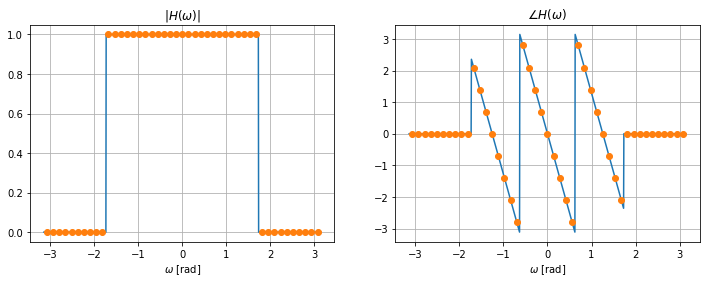

In [8]:
# Filtro pasabajos ideal truncado

fc = 0.275
wc = fc*2*np.pi

def HPB(w,wc,nd):
    mask = np.abs(w)<=wc
    H = np.exp(-1j*w*nd)
    H[~mask] = 0
    return H

Nw = 45 # Número de muestras en frecuencia
M = 11 # Longitud del filtro

w = 2*np.pi*(np.arange(Nw)-np.fix(Nw/2)) / Nw
Hw = HPB(w,wc,(M-1)/2)

wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc,(M-1)/2)

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(wid,np.abs(Hid))
plt.plot(w,np.abs(Hw),'o')
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(wid,np.angle(Hid))
plt.plot(w,np.angle(Hw),'o')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')


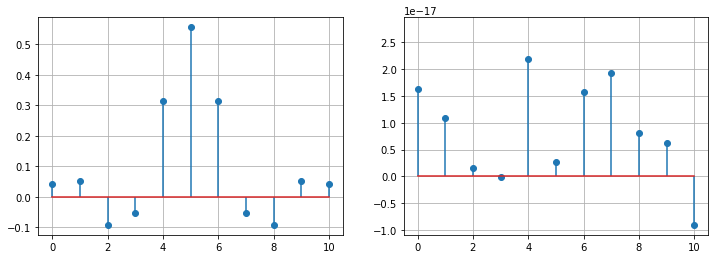

In [9]:
# Matriz de Fourier

A = np.zeros((Nw,M),dtype=complex)
n = np.arange(M)
for k in range(Nw):
    A[k,:] = np.exp(-1j*w[k]*n)

hn = np.matmul(np.linalg.inv(np.matmul(np.conj(A.T),A)),np.matmul(np.conj(A.T),Hw))

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.stem(np.real(hn))
plt.grid('on')

plt.subplot(1,2,2)
plt.stem(np.imag(hn))
plt.grid('on')


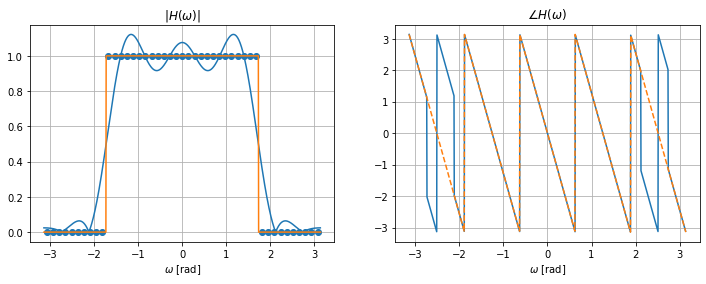

In [10]:
# Respuesta en frecuencia

N = 1024
Homg = np.fft.fft(np.real(hn),N)
Homg = np.fft.fftshift(Homg)
omg = 2*np.pi*(np.arange(0,N) - N/2)/N

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(omg,np.abs(Homg))
plt.plot(w,np.abs(Hw),'C0o')
plt.plot(wid,np.abs(Hid))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(omg,np.angle(Homg))
#plt.plot(wid,np.angle(Hid),'--')
plt.plot(wid,np.angle(np.exp(-1j*wid*(M-1)/2)),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')
